Importing libraries and modules

In [198]:
import pandas as pd
from keras.models import Sequential 
from keras.layers import Dense 
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler 

Importing dataset

In [199]:
df = pd.read_csv('H2.csv')

Inspecting the dataset

In [200]:
pd.set_option('display.max_columns', None)
df.head()

,IsCanceled,LeadTime,ArrivalDateYear,ArrivalDateMonth,ArrivalDateWeekNumber,ArrivalDateDayOfMonth,StaysInWeekendNights,StaysInWeekNights,Adults,Children,Babies,Meal,Country,MarketSegment,DistributionChannel,IsRepeatedGuest,PreviousCancellations,PreviousBookingsNotCanceled,ReservedRoomType,AssignedRoomType,BookingChanges,DepositType,Agent,Company,DaysInWaitingList,CustomerType,ADR,RequiredCarParkingSpaces,TotalOfSpecialRequests,ReservationStatus,ReservationStatusDate
0,0,6,2015,July,27,1,0,2,1,0.0,0,HB,PRT,Offline TA/TO,TA/TO,0,0,0,A,A,0,No Deposit,6,NULL,0,Transient,0.0,0,0,Check-Out,7/3/2015
1,1,88,2015,July,27,1,0,4,2,0.0,0,BB,PRT,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,9,NULL,0,Transient,76.5,0,1,Canceled,7/1/2015
2,1,65,2015,July,27,1,0,4,1,0.0,0,BB,PRT,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,9,NULL,0,Transient,68.0,0,1,Canceled,4/30/2015
3,1,92,2015,July,27,1,2,4,2,0.0,0,BB,PRT,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,9,NULL,0,Transient,76.5,0,2,Canceled,6/23/2015
4,1,100,2015,July,27,2,0,2,2,0.0,0,BB,PRT,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,9,NULL,0,Transient,76.5,0,1,Canceled,4/2/2015


Preprocess input data

In [201]:
#Dropping columns that does not have significance in predicting hotel booking cancellation
df.drop('ArrivalDateYear', axis=1, inplace=True)
df.drop('ArrivalDateWeekNumber', axis=1, inplace=True)
df.drop('ArrivalDateDayOfMonth', axis=1, inplace=True)

#Converting text values in ArrivalDateMonth column to numeric values
month_dict = {'January':1, 'February':2, 'March':3, 'April':4, 'May':5, 'June':6,
              'July':7, 'August':8, 'September':9, 'October':10, 'November':11, 'December':12 }
df["ArrivalDateMonth"] = df["ArrivalDateMonth"].apply(lambda x: month_dict.get(x))

#Converting Children column to integer
df['Children'] = df['Children'].fillna(0)
df["Children"] = df["Children"].astype(int)

#Converting text values in Meal column to numeric values
df['Meal'] = df['Meal'].str.strip()
df['Meal'].mask(df['Meal'] == 'SC', 0, inplace=True)
df['Meal'].mask(df['Meal'] == 'BB', 1, inplace=True)
df['Meal'].mask(df['Meal'] == 'HB', 2, inplace=True)
df['Meal'].mask(df['Meal'] == 'FB', 3, inplace=True)

#Converting text values in Country column to numeric values
country_dict = dict.fromkeys(df.Country.unique())
country_dict = dict(zip(country_dict, range(0,len(df.Country.unique()))))
df["Country"] = df["Country"].apply(lambda x: country_dict.get(x))

#Converting text values in MarketSegment column to numeric values
market_segment_dict = dict.fromkeys(df.MarketSegment.unique())
market_segment_dict = dict(zip(market_segment_dict, range(0,len(df.MarketSegment.unique()))))
df["MarketSegment"] = df["MarketSegment"].apply(lambda x: market_segment_dict.get(x))

#Converting text values in DistributionChannel column to numeric values
distribution_channel_dict = dict.fromkeys(df.DistributionChannel.unique())
distribution_channel_dict = dict(zip(distribution_channel_dict, range(0,len(df.DistributionChannel.unique()))))
df["DistributionChannel"] = df["DistributionChannel"].apply(lambda x: distribution_channel_dict.get(x))

#Converting text values in ReservedRoomType column to numeric values
df['ReservedRoomType'] = df['ReservedRoomType'].str.strip()
reserved_room_type_dict = dict.fromkeys(df.ReservedRoomType.unique())
reserved_room_type_dict = dict(zip(reserved_room_type_dict, range(0,len(df.ReservedRoomType.unique()))))
df["ReservedRoomType"] = df["ReservedRoomType"].apply(lambda x: reserved_room_type_dict.get(x))

#Converting text values in AssignedRoomType column to numeric values
df['AssignedRoomType'] = df['AssignedRoomType'].str.strip()
assigned_room_type_dict = dict.fromkeys(df.AssignedRoomType.unique())
assigned_room_type_dict = dict(zip(assigned_room_type_dict, range(0,len(df.AssignedRoomType.unique()))))
df["AssignedRoomType"] = df["AssignedRoomType"].apply(lambda x: assigned_room_type_dict.get(x))

#Converting text values in DepositType column to numeric values
df['DepositType'] = df['DepositType'].str.strip()
deposit_type_dict = dict.fromkeys(df.DepositType.unique())
deposit_type_dict = dict(zip(deposit_type_dict, range(0,len(df.DepositType.unique()))))
df["DepositType"] = df["DepositType"].apply(lambda x: deposit_type_dict.get(x))

#Replacing '       NULL' value in Agent column to 0 
df['Agent'] = df.Agent.apply(lambda a: 0 if a == '       NULL' else a)
#Converting Agent column to integer
df['Agent'] = df['Agent'].astype(int)
#Replacing '       NULL' value in Company column to 0
df['Company'] = df.Company.apply(lambda c: 0 if c == '       NULL' else c)
#Converting Company column to integer
df['Company'] = df['Company'].astype(int)

#Converting text values in CustomerType column to numeric values
customer_type_dict = dict.fromkeys(df.CustomerType.unique())
customer_type_dict = dict(zip(customer_type_dict, range(0,len(df.CustomerType.unique()))))
df["CustomerType"] = df["CustomerType"].apply(lambda x: customer_type_dict.get(x))

#Converting text values in ReservationStatus column to numeric values
reservation_status_dict = dict.fromkeys(df.ReservationStatus.unique())
reservation_status_dict = dict(zip(reservation_status_dict, range(0,len(df.ReservationStatus.unique()))))
df["ReservationStatus"] = df["ReservationStatus"].apply(lambda x: reservation_status_dict.get(x))

#Dropping ReservationStatus column
df.drop('ReservationStatus', axis=1, inplace=True)

#Dropping ReservationStatusDate column 
df.drop('ReservationStatusDate', axis=1, inplace=True)

In [202]:
pd.set_option('display.max_columns', None)
df.head()

,IsCanceled,LeadTime,ArrivalDateMonth,StaysInWeekendNights,StaysInWeekNights,Adults,Children,Babies,Meal,Country,MarketSegment,DistributionChannel,IsRepeatedGuest,PreviousCancellations,PreviousBookingsNotCanceled,ReservedRoomType,AssignedRoomType,BookingChanges,DepositType,Agent,Company,DaysInWaitingList,CustomerType,ADR,RequiredCarParkingSpaces,TotalOfSpecialRequests
0,0,6,7,0,2,1,0,0,2,0,0,0,0,0,0,0,0,0,0,6,0,0,0,0.0,0,0
1,1,88,7,0,4,2,0,0,1,0,1,0,0,0,0,0,0,0,0,9,0,0,0,76.5,0,1
2,1,65,7,0,4,1,0,0,1,0,1,0,0,0,0,0,0,0,0,9,0,0,0,68.0,0,1
3,1,92,7,2,4,2,0,0,1,0,1,0,0,0,0,0,0,0,0,9,0,0,0,76.5,0,2
4,1,100,7,0,2,2,0,0,1,0,1,0,0,0,0,0,0,0,0,9,0,0,0,76.5,0,1


Splitting the dataset into input features (X) and output (y)

In [203]:
X = df.drop('IsCanceled', axis=1)
y = df['IsCanceled']

Normalizing the input features

In [204]:
scaler = StandardScaler() 
X = scaler.fit_transform(X) 

Splitting dataset into training and testing sets

In [205]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) 

In [206]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(63464, 25)
(63464,)
(15866, 25)
(15866,)


Defining model architecture

In [207]:
model = Sequential() 
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu')) 
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

Compiling model

In [208]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

Fitting model on training data

In [209]:
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/10
1984/1984 [==============================] - 4s 2ms/step - loss: 0.4040 - accuracy: 0.8088 - val_loss: 0.3713 - val_accuracy: 0.8262
Epoch 2/10
1984/1984 [==============================] - 4s 2ms/step - loss: 0.3650 - accuracy: 0.8286 - val_loss: 0.3619 - val_accuracy: 0.8258
Epoch 3/10
1984/1984 [==============================] - 4s 2ms/step - loss: 0.3504 - accuracy: 0.8336 - val_loss: 0.3533 - val_accuracy: 0.8312
Epoch 4/10
1984/1984 [==============================] - 4s 2ms/step - loss: 0.3419 - accuracy: 0.8375 - val_loss: 0.3420 - val_accuracy: 0.8427
Epoch 5/10
1984/1984 [==============================] - 3s 2ms/step - loss: 0.3365 - accuracy: 0.8401 - val_loss: 0.3449 - val_accuracy: 0.8347
Epoch 6/10
1984/1984 [==============================] - 3s 2ms/step - loss: 0.3313 - accuracy: 0.8435 - val_loss: 0.3447 - val_accuracy: 0.8337
Epoch 7/10
1984/1984 [==============================] - 4s 2ms/step - loss: 0.3271 - accuracy: 0.8463 - val_loss: 0.3410 - val_accuracy:

Evaluating model on test data

In [210]:
score = model.evaluate(X_test, y_test)

496/496 [==============================] - 1s 1ms/step - loss: 0.3337 - accuracy: 0.8448


In [211]:
score

[0.3337157964706421, 0.8448253870010376]

Visualizing Accuracy and Loss

In [212]:
import matplotlib.pyplot as plt

Plotting the training and validation accuracy over epochs

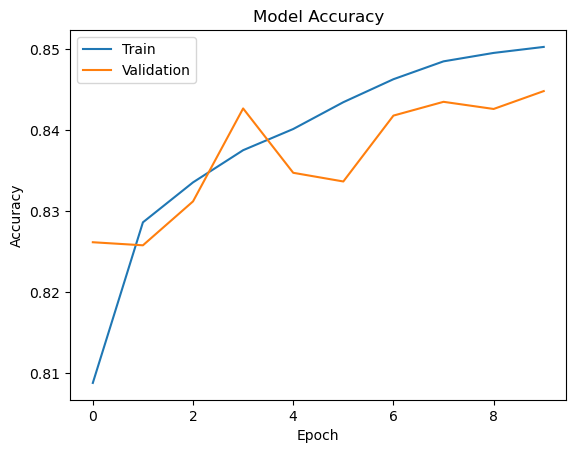

In [213]:
plt.plot(history.history['accuracy']) 
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

Plotting the training and validation loss over epochs

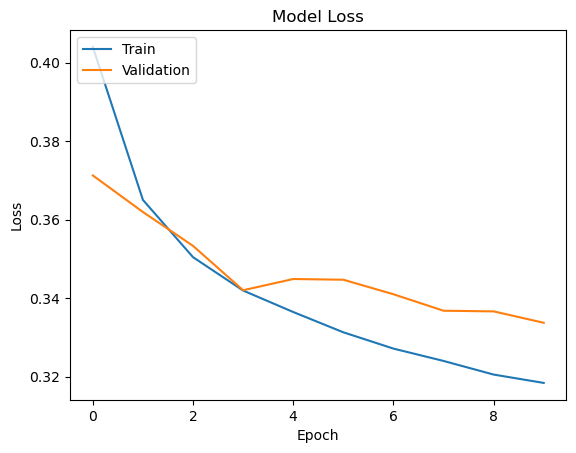

In [214]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()